## Отчет №4 Обучение модели


Цели этапа:

1) Обучить модель на обучающей выборке, используя алгоритмы глубокого обучения.

2) Оптимизировать гиперпараметры модели для достижения высокой точности распознавания.

3) Использовать валидационную выборку для контроля качества модели и предотвращения переобучения.

In [ ]:
def train_step(model: torch.nn.Module,
         data_loader: torch.utils.data.DataLoader,
         criterion: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         accuracy_fn: torchmetrics.Accuracy,
         device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.train()
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = criterion(logits, y)
        train_loss += loss.item()

        preds = logits.argmax(dim = 1)
        train_acc += accuracy_fn(preds, y).item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              criterion: torch.nn.Module,
              accuracy_fn: torchmetrics.Accuracy,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_logits = model(X)

            # 2. Calculate loss and accuracy
            test_loss += criterion(test_logits, y)
            preds = test_logits.argmax(dim = 1)
            test_acc += accuracy_fn(preds, y)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(data_loader=val_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

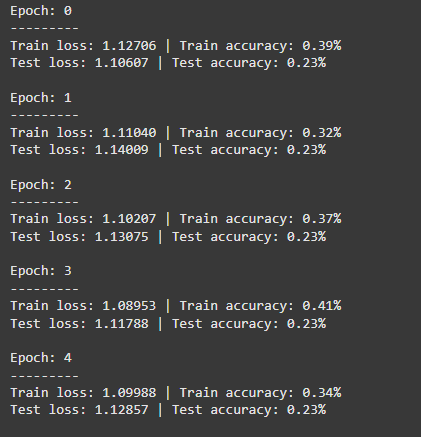

Данная модель показала низкую точность и высокие потери. Поэтому используем предобученную модель EfficientNet_B0.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(data_loader=val_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

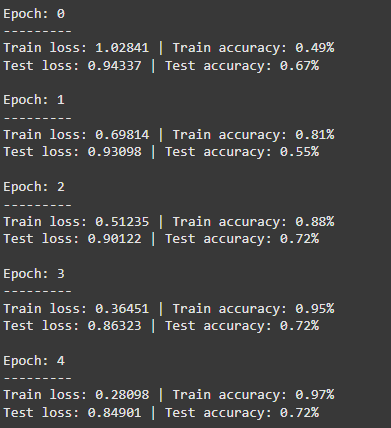

Точность этой модели в разы больше, чем предыдущей.